### Setup notebook

In [5]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Let's start building

In [3]:
# import
import pandas as pd
import json
from google.colab import drive
if COLAB:
    path = directory + 'data/'
    predict_days_t = pd.read_pickle(path + 'predict_days_t.pkl')
predict_days_t

,username,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section
post_url,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,4487,2283,53.093023,151,3.511628,36
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,4038,1109,31.685714,50,1.428571,33
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,25000,506,14.055556,4,0.111111,29
https://www.instagram.com/p/B-xB_snKjld/,squardes_,25000,1758,41.857143,14,0.333333,29
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,48600,20478,553.459459,31,0.837838,28
...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,37900,1365,50.555556,5,0.185185,0
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,37900,718,34.190476,5,0.238095,0
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,37900,1100,37.931034,0,0.000000,0


In [4]:
# Count how many posts were never trending
freq = predict_days_t['days_in_hashtag_top_section'].value_counts()
total_count = len(predict_days_t.index)
print(freq.iloc[0]/total_count*100)

95.65180029217152


95.65% of the posts where never trending

KeyboardInterrupt: ignored

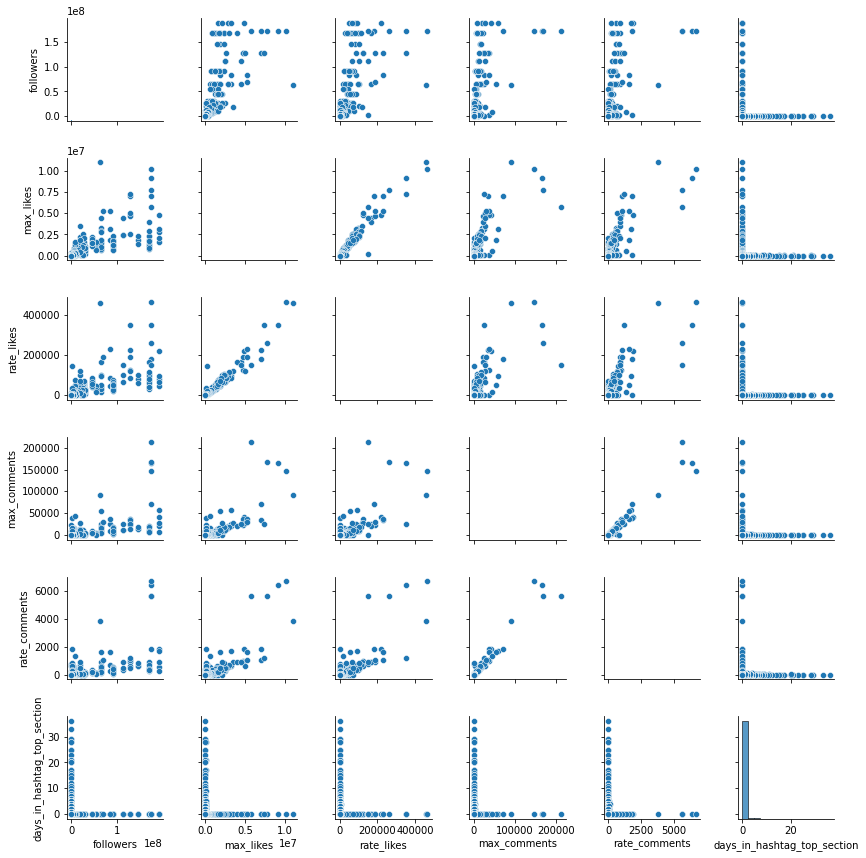

In [5]:
# Examine the data
import seaborn as sns
cols = ['followers', 'max_likes', 'rate_likes', 'max_comments', 'rate_comments', 'days_in_hashtag_top_section']
sns.pairplot(predict_days_t[cols], height=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


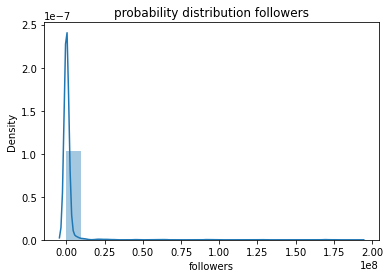

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


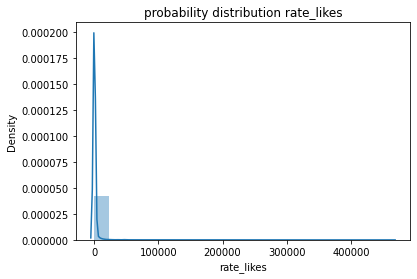

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


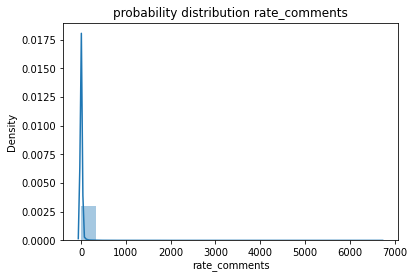

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


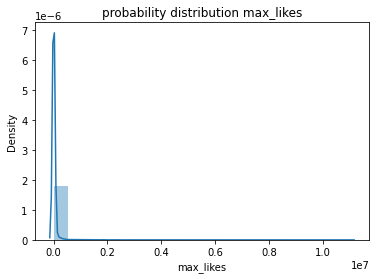

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


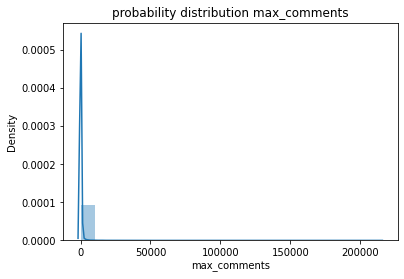

In [6]:
import matplotlib.pyplot as plt

# Prob dist followers
sns.distplot(predict_days_t['followers'],bins=20)
plt.title('probability distribution followers')
plt.show()

# Prob dist rate_likes
sns.distplot(predict_days_t['rate_likes'],bins=20)
plt.title('probability distribution rate_likes')
plt.show()

# Prob dist rate_comments
sns.distplot(predict_days_t['rate_comments'],bins=20)
plt.title('probability distribution rate_comments')
plt.show()

# Prob dist max_likes
sns.distplot(predict_days_t['max_likes'],bins=20)
plt.title('probability distribution max_likes')
plt.show()

# Prob dist max_comments
sns.distplot(predict_days_t['max_comments'],bins=20)
plt.title('probability distribution max_comments')
plt.show()

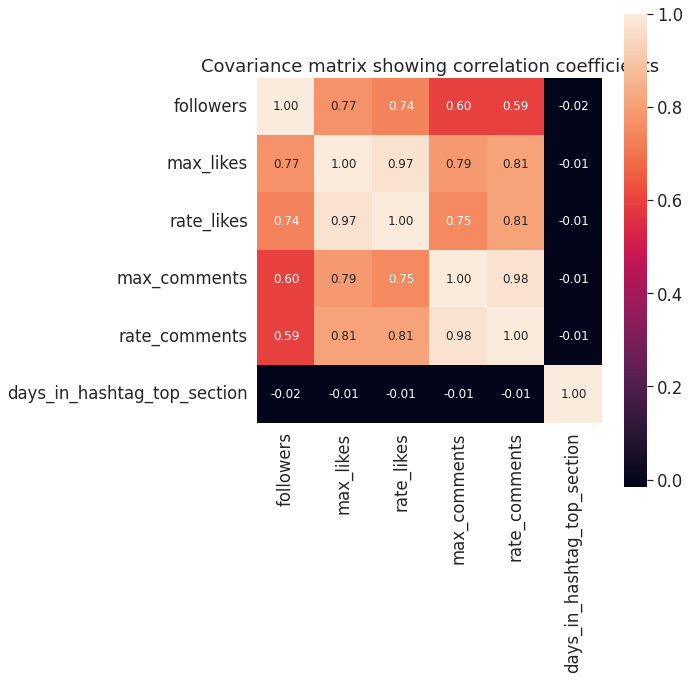

In [7]:
# Calculate the covariance matrix
import numpy as np

cols = ['followers', 'max_likes', 'rate_likes', 'max_comments', 'rate_comments', 'days_in_hashtag_top_section']

from sklearn.preprocessing import StandardScaler
# Standardize features
stdsc = StandardScaler()
X_std = stdsc.fit_transform(predict_days_t[cols].iloc[:,range(0,6)].values)

cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

### Let's one-hot encode the usernames

In [8]:
predict_days_t

,username,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section
post_url,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,xxlexx007,4487,2283,53.093023,151,3.511628,36
https://www.instagram.com/p/B_CHJzXDeNF/,vinceropitini,4038,1109,31.685714,50,1.428571,33
https://www.instagram.com/p/B-_07jGpiWT/,squardes_,25000,506,14.055556,4,0.111111,29
https://www.instagram.com/p/B-xB_snKjld/,squardes_,25000,1758,41.857143,14,0.333333,29
https://www.instagram.com/p/B-9fgRUqRo5/,misfashionedsneakers,48600,20478,553.459459,31,0.837838,28
...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,oh.2x,37900,1365,50.555556,5,0.185185,0
https://www.instagram.com/p/B_O9cFuAgCb/,oh.2x,37900,718,34.190476,5,0.238095,0
https://www.instagram.com/p/B-7s7uhnD_v/,oh.2x,37900,1100,37.931034,0,0.000000,0


In [9]:
# username can be considered a categorical feature

# Check the datatypes of the features
## print(df.dtypes)
# Make sure the categorical variables are of the correct type
categ_df = predict_days_t.copy()
categ_df['username'] = predict_days_t.username.astype('category')

# Get one hot encoding of columns B
one_hot = pd.get_dummies(categ_df['username'])

# Drop column B as it is now encoded
one_hot_df = predict_days_t.drop('username',axis = 1)

# Join the encoded df
one_hot_df = one_hot_df.join(one_hot)
one_hot_df

,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,4487,2283,53.093023,151,3.511628,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_CHJzXDeNF/,4038,1109,31.685714,50,1.428571,33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-_07jGpiWT/,25000,506,14.055556,4,0.111111,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-xB_snKjld/,25000,1758,41.857143,14,0.333333,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-9fgRUqRo5/,48600,20478,553.459459,31,0.837838,28,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,37900,1365,50.555556,5,0.185185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_O9cFuAgCb/,37900,718,34.190476,5,0.238095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7s7uhnD_v/,37900,1100,37.931034,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# make days_in_hashtag_top_section the last column

cols = list(one_hot_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('days_in_hashtag_top_section')) #Remove days_in_hashtag_top_section from list
one_hot_df = one_hot_df[cols+['days_in_hashtag_top_section']] #Create new dataframe with columns in the order you want
one_hot_df

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son,days_in_hashtag_top_section
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B-cuVYrJncn/,4487,2283,53.093023,151,3.511628,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
https://www.instagram.com/p/B_CHJzXDeNF/,4038,1109,31.685714,50,1.428571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
https://www.instagram.com/p/B-_07jGpiWT/,25000,506,14.055556,4,0.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
https://www.instagram.com/p/B-xB_snKjld/,25000,1758,41.857143,14,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
https://www.instagram.com/p/B-9fgRUqRo5/,48600,20478,553.459459,31,0.837838,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_A0x6vlqb6/,37900,1365,50.555556,5,0.185185,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_O9cFuAgCb/,37900,718,34.190476,5,0.238095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-7s7uhnD_v/,37900,1100,37.931034,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calculate the account which has the largest total of days trending

In [11]:
# Check how many posts by username

# Make sure the categorical variables are of the correct type
categ_df = predict_days_t.copy()
categ_df['username'] = predict_days_t.username.astype('category')
print(categ_df['username'].value_counts())

misslolaofficial    86
doublebreaste       82
thestreetgeek_      70
culturfits          60
purplerang          59
                    ..
danielcichosz        1
naazzz25             1
velvetmode           1
mariah_noelle        1
lucaskastberg        1
Name: username, Length: 1301, dtype: int64


In total there were 1301 usernames, with misslolaofficial having the most posts (86).

In [12]:
# count total number of days trending by username
categ_df.groupby('username').sum().sort_values(by=["days_in_hashtag_top_section"], axis=0, ascending=False)

,followers,max_likes,rate_likes,max_comments,rate_comments,days_in_hashtag_top_section
username,,,,,,
squardes_,525000,18789,776.750494,134,5.703304,127
misfashionedsneakers,631800,143906,5047.941184,347,13.598280,97
d.ave.y,101700,15448,590.721776,816,31.702083,61
urbanculturs,3006000,261592,10700.108720,571,22.697749,48
pierre.laurent,1558800,98538,3942.768222,1428,57.187268,47
...,...,...,...,...,...,...
hyo_814,29472,7882,254.282737,735,23.918798,0
hynxgee,7242,1655,51.910057,63,1.918103,0
hwimm_,281600,20887,1149.809722,915,49.697637,0


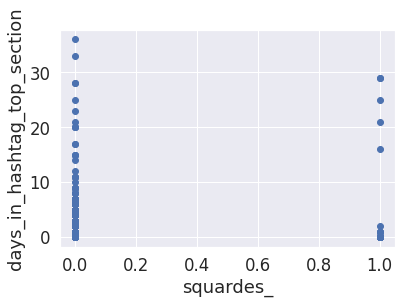

In [13]:
# Display the relationship between days_in_hashtag_top_section and the username being squardes_
plt.scatter(one_hot_df['squardes_'], one_hot_df['days_in_hashtag_top_section'])
plt.xlabel('squardes_')
plt.ylabel('days_in_hashtag_top_section')
plt.show()

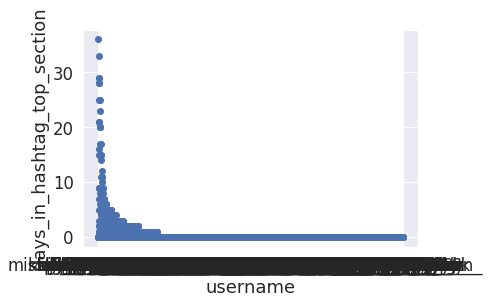

In [14]:
plt.scatter(categ_df['username'], categ_df['days_in_hashtag_top_section'])
plt.xlabel('username')
plt.ylabel('days_in_hashtag_top_section')
plt.show()

## Let's train

In [15]:
# First we're going to split the training and test datasets and not touch the test data
from sklearn.model_selection import train_test_split

# 30% for testing
train_dataset, test_dataset = train_test_split(one_hot_df, test_size=0.3, random_state=100)
test_dataset

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son,days_in_hashtag_top_section
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B_IbYgIl0xk/,109000,1327,55.291667,10,0.416667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-2vtn9pp3O/,6100000,187782,6057.483871,695,22.419355,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-46-TbqtNk/,243000,2443,81.433333,219,7.300000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-mKbehnv6H/,15600,1219,32.945946,76,2.054054,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_VRl5bIbrw/,41700,1796,94.526316,4,0.210526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B-b4YF8FkB5/,100000,6724,164.000000,110,2.682927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-nAzLkCrk4/,14400,1252,73.647059,9,0.529412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-qYTFxJQFz/,186000,7147,204.200000,44,1.257143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# export train and test datasets
import json
from google.colab import drive
if COLAB:
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
    test_dataset.to_pickle(directory + 'data_predict_num_days_trending/test_dataset.pkl')
    train_dataset.to_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')


### We're now going to decide what type of ML model to chose

In [1]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')

In [3]:
from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']

# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
X_train

,followers,max_likes,rate_likes,max_comments,rate_comments,064_steady,12_babu_05,1_nakayub1_9,1st.sholo,1zsoo,...,zapasrun,zaralarsson,zaramenmag,zaraynaf,zehvier,zendaya,zitawu,zoeygrossman,zoyaekhann,zuzik.son
post_url,,,,,,,,,,,,,,,,,,,,,
https://www.instagram.com/p/B_AV9zAjCyR/,91500,3545,506.428571,25,3.571429,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-eeEiVgdNs/,23800,2640,66.000000,48,1.200000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_LC1NcgXRc/,7495,835,36.304348,143,6.217391,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-uOZTHAi4g/,1026,170,5.000000,5,0.147059,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B_BHdmbFWHm/,134000,1236,45.777778,14,0.518519,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.instagram.com/p/B_K5UzTHD5B/,165000,1781,77.434783,20,0.869565,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-bwfoXn7bB/,1825,145,3.536585,0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.instagram.com/p/B-emWnkFb_k/,6924,837,20.925000,172,4.300000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# We are going to use mean_squared_error to measure the model's performance
from sklearn.metrics import mean_squared_error

def model_performance(model):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    print("mse: ", mse)

We now test the performance for 6 different types of models

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

""" It crashes if I do a degree higher than 1 as it uses all the RAM
# 1. Polynomial regression 3-degree
print("Polynomial regression 3-degree")
model_1 = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_1)
print()
"""
# 2. Linear regression
print("Linear regression")
model_linear = Pipeline([('poly', PolynomialFeatures(degree=1)), 
                    ('linear', LinearRegression(fit_intercept=False))])
model_performance(model_linear)
print()

# 3. Support Vector Regression
print("Support Vector Regression")
from sklearn import svm

model_3 = Pipeline([('svr', svm.SVR())])
model_performance(model_3)
print()

# 4. Nu Support Vector Regression
print("Nu Support Vector Regression")
from sklearn import svm

model_4 = Pipeline([('nu_svr', svm.NuSVR())])
model_performance(model_4)
print()

# 5. Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGD")
from sklearn.linear_model import SGDRegressor

model_5 = Pipeline([('sgd', SGDRegressor())])
model_performance(model_5)
print()

# 6. Multi-layer Perceptron regressor.
print("Multi-layer Perceptron regressor")
from sklearn.neural_network import MLPRegressor

model_6 = Pipeline([('mlp', MLPRegressor(hidden_layer_sizes=(1,)))]) # , activation='identity', alpha=0.01, learning_rate='adaptive'))])
model_performance(model_6)
print()

Linear regression
mse:  2.059762543518122

Support Vector Regression
mse:  2.274908402012617

Nu Support Vector Regression
mse:  2.303286342232278

SGD
mse:  4.661534139649279e+42

Multi-layer Perceptron regressor
mse:  2.268355059028275



We can see that the best machine learning model (the one with the lowest mean squared error) will be the linear regression model expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{1306} X_{ij} w_j $$

#### Fit the linear regression model

In [6]:
# Train the model on the training dataset
model_linear.fit(X_train, y_train)
y_train_pred = model_linear.predict(X_train)
y_val_pred = model_linear.predict(X_val)


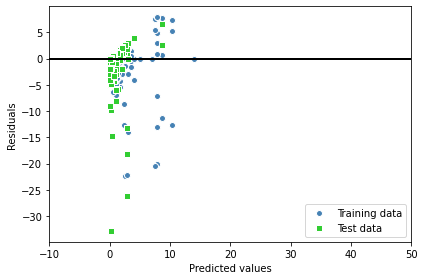

In [9]:
# Plot the predicted values agains the residuals
import matplotlib.pyplot as plt
## Plot the predicted values of the training dataset
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
## Plot the predicted values of the test dataset
plt.scatter(y_val_pred,  y_val_pred - y_val,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

##### Evaluate Linear Regression

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE: train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_val, y_val_pred)))
print('R^2: train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_val, y_val_pred)))

MSE: train: 0.789, test: 2.060
R^2: train: 0.357, test: 0.091


##### Calculate the regression coefficients

In [11]:
intercept = model_linear.fit(X_train, y_train)['linear'].intercept_
coeff = model_linear.fit(X_train, y_train)['linear'].coef_

print("intercept", intercept)
print("coeff", coeff)

intercept 0.0
coeff [ 1.71361414e-01 -3.10994235e-09  2.10364402e-07 ... -1.71041499e-01
 -1.71092412e-01 -1.71100974e-01]


### Introduce Principal Component Analysis

Currently we have 1306 features one possible avenue could be to reduce the size of the feature also known as dimensionality reduction.

PCA is used for dimensionality reduction.
There are two possible ways to do this:
* Linear methods (PCA)
* Non-linear methods (Manifold learning)

PCA transforms a set of correlated variables ($p$) into a smaller ($k \ < \ p$) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible.

**How does PCA work?**

If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space.

*Note:* Very important to perform standardise the features before performing PCA

The objective is that with a model with a lower number of features (i.e. a simpler model), the performance will improve.

In [ ]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

In [ ]:
# import
import json
import pandas as pd
from google.colab import drive
if COLAB:
    train_dataset = pd.read_pickle(directory + 'data_predict_num_days_trending/train_dataset.pkl')

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataframe into the features and the predicted values
X = train_dataset.iloc[:, :-1]
y = train_dataset['days_in_hashtag_top_section']

# Split it into training and validation datasets to check which model to use
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
X_train

In [ ]:
# We are going to use mean_squared_error to measure the model's performance
from sklearn.metrics import mean_squared_error

def model_performance(model):
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    print("mse: ", mse)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# Test for different number of components of PCA
sc_x = StandardScaler()
sc_y = StandardScaler()

train_score = []
val_score = []
cum_variance = []

X_train_val = X_train
y_train_val = y_train
X_val_test = X_val
y_val_test = y_val

for i in range(1, 10):
    # We are going to perform cross-validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=100)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std = pipe_lr.predict(X_train)
    y_val_pred_std = pipe_lr.predict(X_val)

    y_train_pred = sc_y.inverse_transform(y_train_pred_std.reshape(-1, 1))
    y_val_pred = sc_y.inverse_transform(y_val_pred_std.reshape(-1, 1))

    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    val_score = np.append(val_score, r2_score(y_val, y_val_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

print("average train_score: ", train_score.mean())
print("average val_score: ", val_score.mean())
print("average cum_variance: ", cum_variance.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

average train_score:  0.0019260949624768159
average val_score:  -0.05809294565367863
average cum_variance:  0.010788099964027607
